In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np

# Overall Analysis<bold>
No of editions<br>
No of cities<br>
No of envents/sprts<br>
No of athletes<br>
participating nations

In [4]:
df=pd.read_csv('athlete_events.csv')
reagon_df=pd.read_csv('noc_regions.csv')

In [5]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [6]:
df=df[df['Season']=='Summer']

In [7]:
df['Year'].sort_values().unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1996, 2000, 2004, 2008, 2012, 2016])

In [8]:
df=df[df['Year']!=1906]

In [9]:
no_of_editions=df['Year'].sort_values().unique().shape[0]

In [10]:
final_df=pd.merge(df,reagon_df,on='NOC',how='left')

In [11]:
final_df['region'].isnull().sum()

np.int64(370)

In [12]:
final_df['region'].duplicated().sum()

np.int64(220613)

In [13]:
no_of_City=final_df['City'].sort_values().unique().shape[0]

In [14]:
no_of_sports=df['Sport'].unique().shape[0]

In [15]:
no_of_events=df['Event'].unique().shape[0]

In [16]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [17]:
no_of_participents=df['Name'].unique().shape[0]

In [18]:
particapted_nations=final_df['region'].dropna().sort_values().unique().shape[0]

In [19]:
df=final_df

In [20]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
nations_over_time=df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

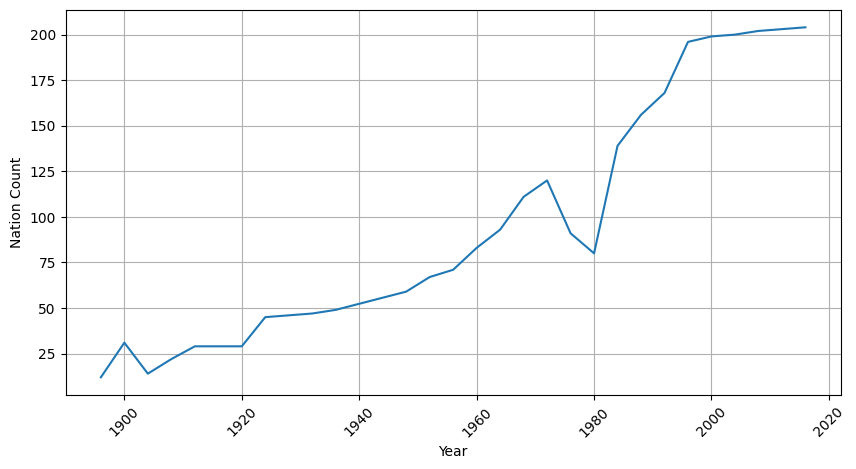

In [24]:
plt.figure(figsize=(10,5))
x=nations_over_time['Year']
y=nations_over_time['count']
sns.lineplot(x=x,y=y,)
plt.ylabel('Nation Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [25]:
Events_over_time=df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [26]:
Events_over_time.rename(columns={'Year':'Edition','count':'No of Events'},inplace=True)

In [27]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


# new thing Pivot table


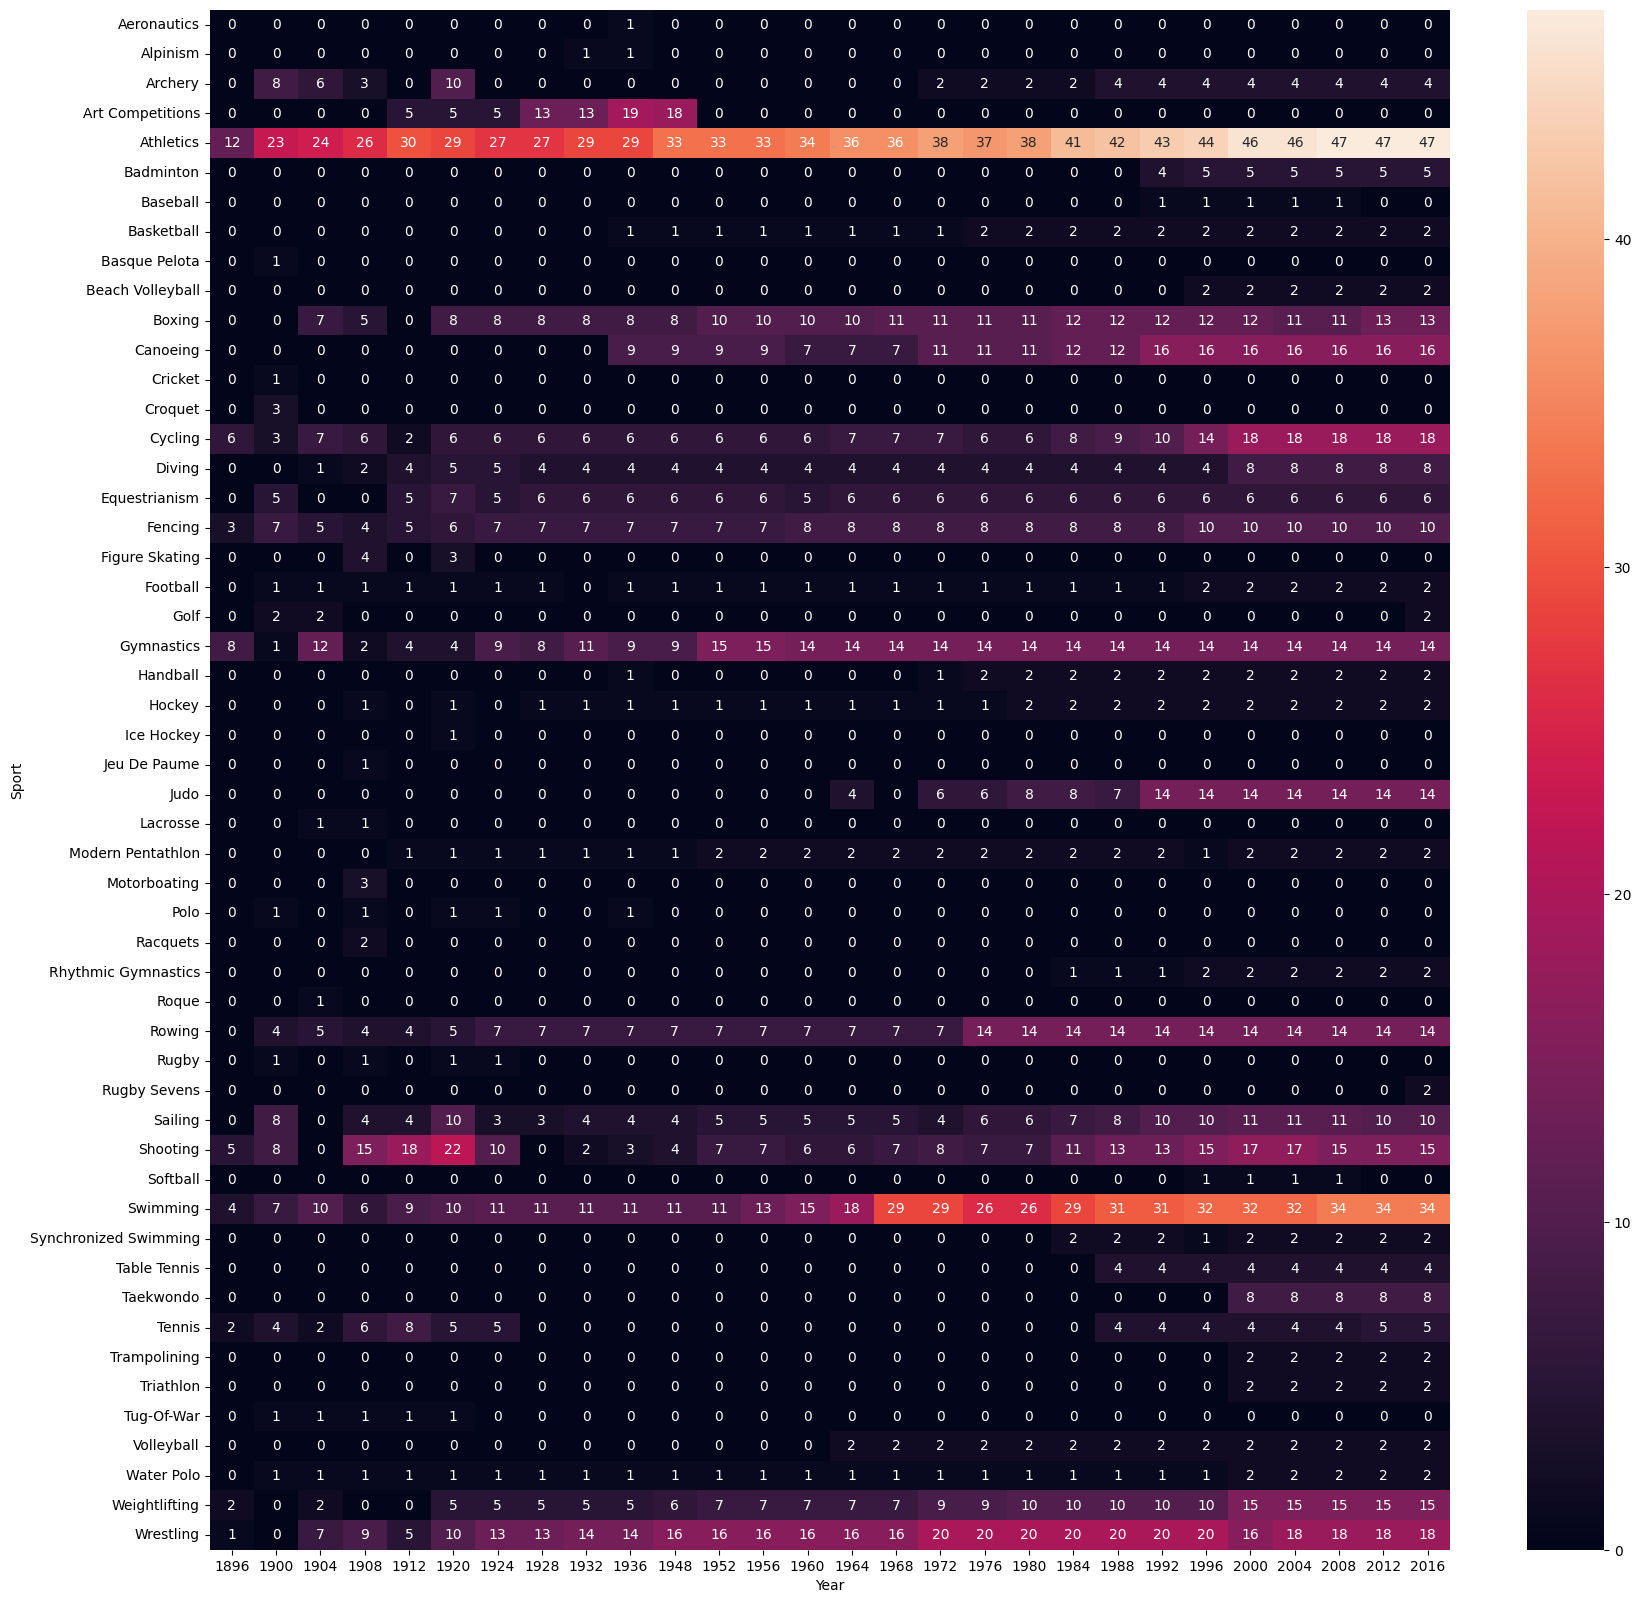

In [28]:
x=df.drop_duplicates(['Year','Event','Sport'])
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)
plt.show()

In [29]:
df=pd.concat([df,pd.get_dummies(df['Medal']).replace({True:1,False:0})],axis=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13856\3914640343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=pd.concat([df,pd.get_dummies(df['Medal']).replace({True:1,False:0})],axis=1)


In [30]:
sports=df['Sport'].unique().tolist()

In [31]:

sports.insert(0,'Overall')


In [32]:

sports

['Overall',
 'Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [33]:
''' Teacher's way

def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df=temp_df[temp_df['sport']==sport]
    x = temp_df['Name'].value_caunt().reset_index().head(15).mearge(df,left_on='index',right_on='Nzme',how='left')[['index','Name','Sport','region']].drop_duplicated()
    x.rename({x:y(change acco to data set x is the name ,y is waht you want it to be)})
    reutrn x
    '''

" Teacher's way\n\ndef most_successful(df,sport):\n    temp_df=df.dropna(subset=['Medal'])\n\n    if sport != 'Overall':\n        temp_df=temp_df[temp_df['sport']==sport]\n    x = temp_df['Name'].value_caunt().reset_index().head(15).mearge(df,left_on='index',right_on='Nzme',how='left')[['index','Name','Sport','region']].drop_duplicated()\n    x.rename({x:y(change acco to data set x is the name ,y is waht you want it to be)})\n    reutrn x\n    "

In [34]:
if sports[1]=='Overall':
    temp=df.groupby(['Name','region','Sport'])[['Bronze','Gold','Silver']].sum().reset_index()
    temp['medals']=temp['Gold']+temp['Silver']+temp['Bronze']
    temp=temp.drop(['Bronze','Gold','Silver'],axis=1).sort_values('medals',ascending=False)
    print(temp.head(10))
else:
     temp=df.groupby(['Name','region','Sport'])[['Bronze','Gold','Silver']].sum().reset_index()
     temp=temp[temp['Sport']==sports[1]]
     temp['medals']=temp['Gold']+temp['Silver']+temp['Bronze']
     temp=temp.drop(['Bronze','Gold','Silver'],axis=1).sort_values('medals',ascending=False)
     print(temp.head(10))

                                   Name     region       Sport  medals
104233                   Teresa Edwards        USA  Basketball       5
98109       Sergey Aleksandrovich Belov     Russia  Basketball       4
102511        Suzanne Brigit "Sue" Bird        USA  Basketball       4
16215              Carmelo Kyan Anthony        USA  Basketball       4
103524         Tamika Devonne Catchings        USA  Basketball       4
63909          Lauren Elizabeth Jackson  Australia  Basketball       4
66255   Lisa Deshawn Leslie (-Lockwood)        USA  Basketball       4
23378              Diana Lurena Taurasi        USA  Basketball       4
62487               Kristi Lee Harrower  Australia  Basketball       4
34717       Gennady Georgiyevich Volnov     Russia  Basketball       4


In [35]:
sports[0]

'Overall'

# country wise 
- Countrywise medal tally per year(line plot)
- What countries are  good at heatmap
- Most successful Athleates(top 10)

In [36]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0


<Axes: xlabel='Year', ylabel='Medal'>

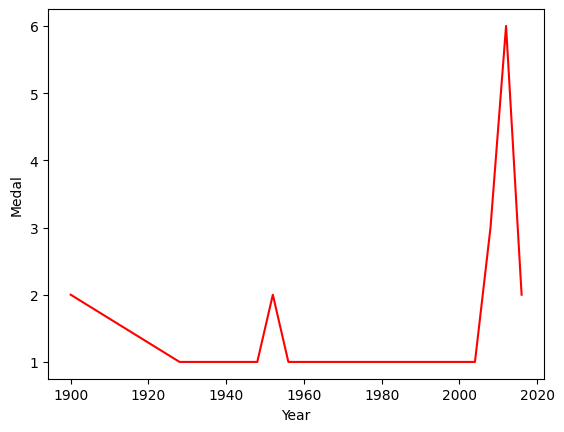

In [37]:
temp_df=df.dropna(subset=['Medal'])
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal','region'])
temp_df=temp_df[temp_df['region']=='India']
temp_df=temp_df.groupby(['Year']).count()['Medal'].reset_index()
temp_df
sns.lineplot(data=temp_df,x='Year',y='Medal',color='red')


<Axes: xlabel='Year', ylabel='Medal'>

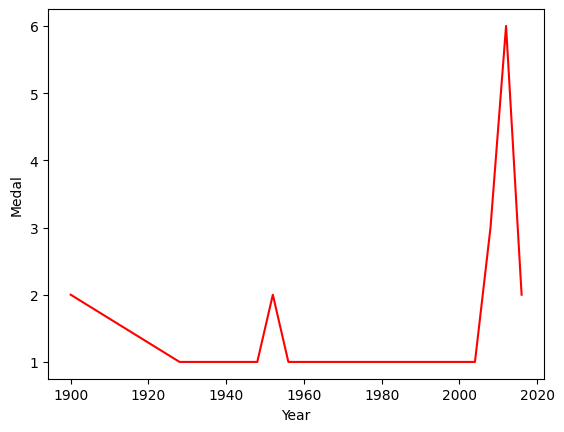

In [38]:
sns.lineplot(data=temp_df,x='Year',y='Medal',color='red')

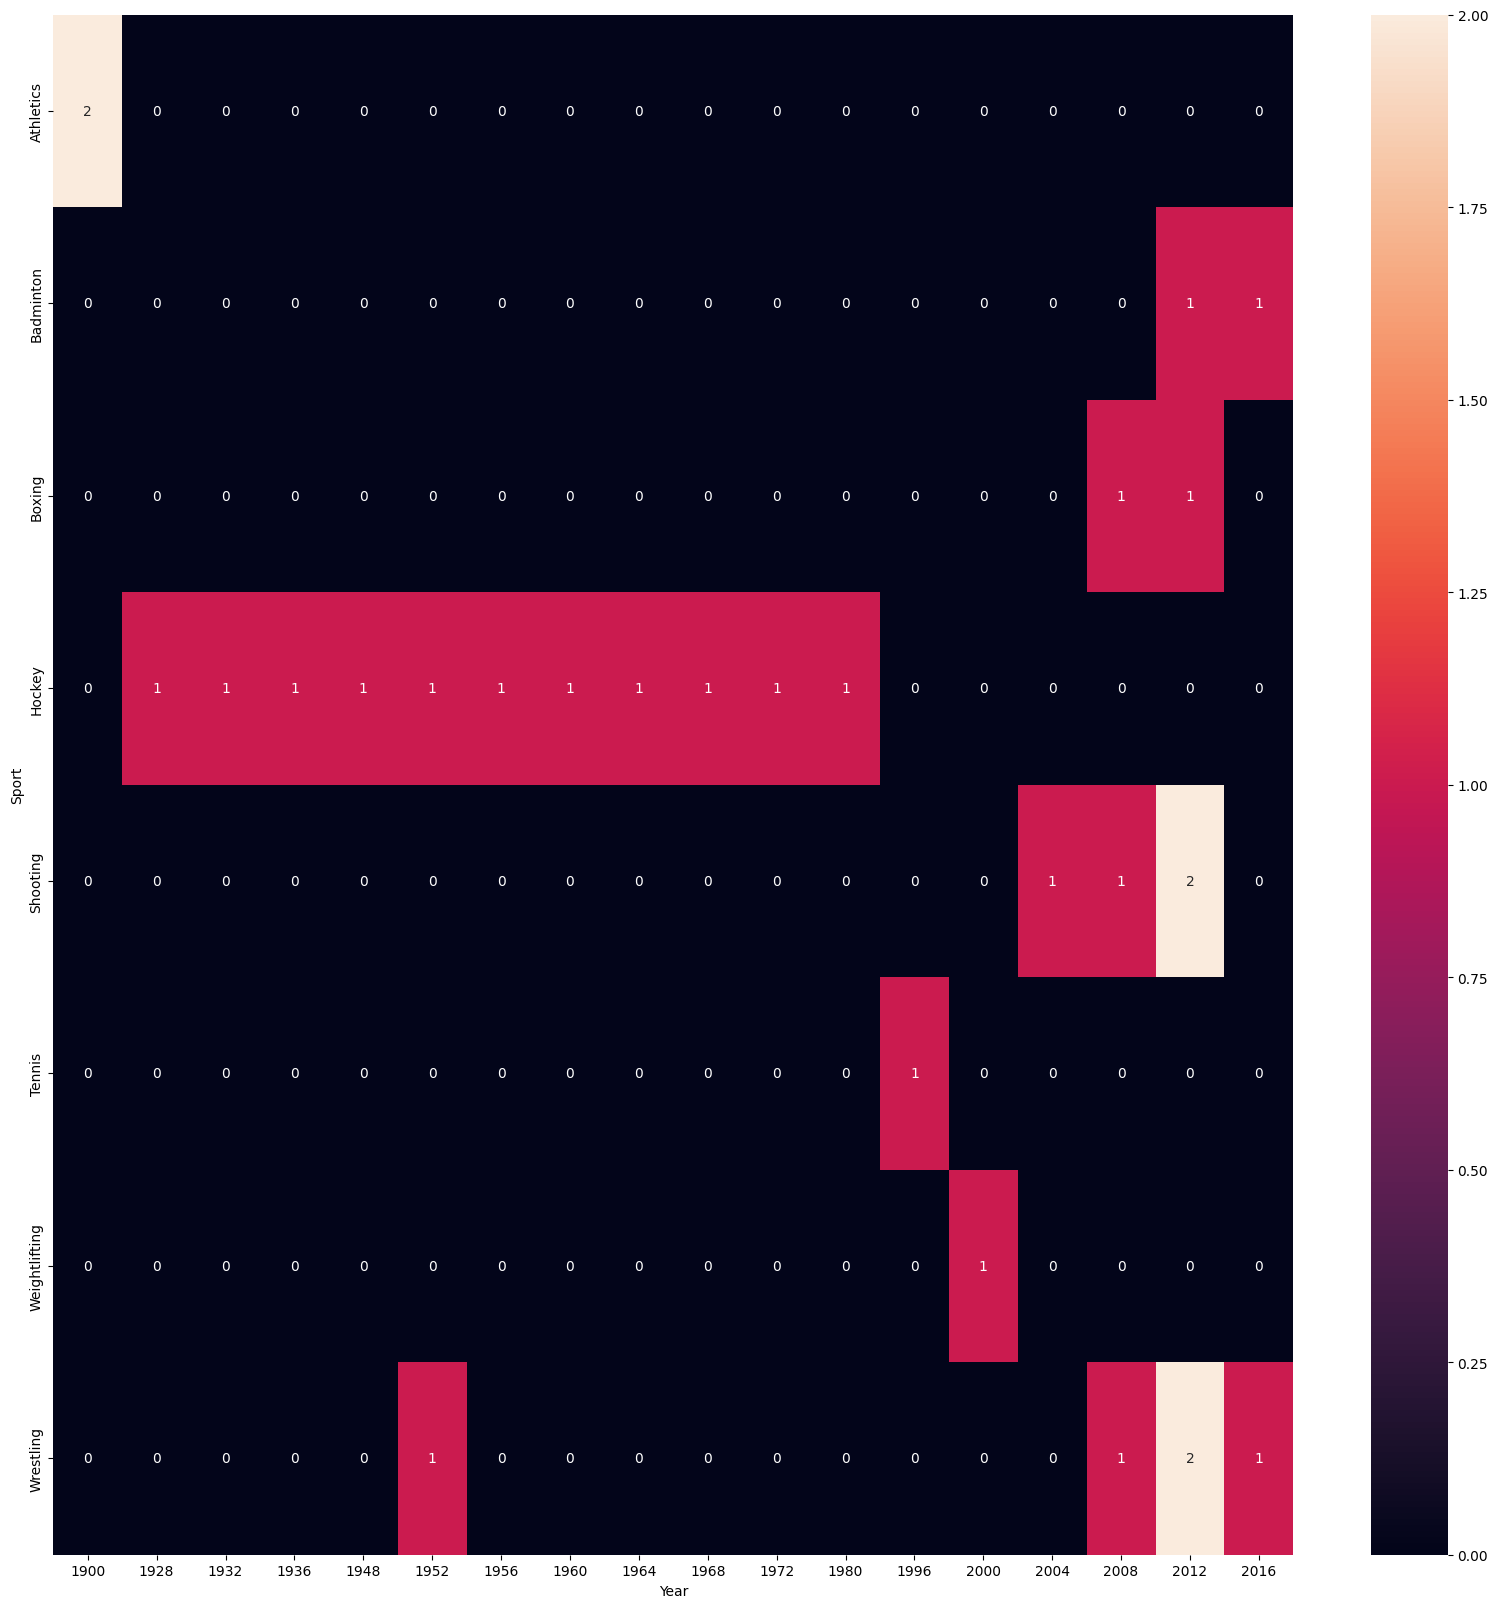

In [39]:
temp_df=df.dropna(subset=['Medal'])
temp_df=temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal','region'])
temp_df=temp_df[temp_df['region']=='India']
plt.figure(figsize=(20,20))
sns.heatmap(temp_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)
plt.show()

In [40]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0


In [41]:
if countr[1]=='Overall':
    temp=df.groupby(['Name','region','Sport'])[['Bronze','Gold','Silver']].sum().reset_index()
    temp['medals']=temp['Gold']+temp['Silver']+temp['Bronze']
    temp=temp.drop(['Bronze','Gold','Silver'],axis=1).sort_values('medals',ascending=False)
    print(temp.head(10))
else:
     temp=df.groupby(['Name','region','Sport'])[['Bronze','Gold','Silver']].sum().reset_index()
     temp=temp[temp['Sport']==sports[1]]
     temp['medals']=temp['Gold']+temp['Silver']+temp['Bronze']
     temp=temp.drop(['Bronze','Gold','Silver'],axis=1).sort_values('medals',ascending=False)
     print(temp.head(10))



NameError: name 'countr' is not defined

In [ ]:
x

,Name,count
0,Leslie Walter Claudius,4
1,Udham Singh Kular,4
2,"Victor John ""V. J."" Peter",3
3,Dhyan Chand Bais,3
4,Richard James Allen,3
...,...,...
136,Surinder Singh Sodhi Shokar,1
137,"William Patrick ""Pat"" Sullivan",1
138,Dung Dung Sylvanus,1
139,"Max ""Maxie"" Vaz",1


In [ ]:
import plotly.figure_factory as ff


In [ ]:
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0


In [ ]:
df.head(
)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No_Medal,Netherlands,NaN,0,0,0


In [ ]:
atheleate_df=df.drop_duplicates(['Name','region'])
x1=atheleate_df['Age'].dropna()
x2=atheleate_df[atheleate_df['Medal']=='Gold']['Age'].dropna()
x3=atheleate_df[atheleate_df['Medal']=='Silver']['Age'].dropna()
x4=atheleate_df[atheleate_df['Medal']=='Bronze']['Age'].dropna()

fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalest','Silver Medalist',"Bronze Medalist"],show_hist=False,show_rug=False)
fig.show()



In [ ]:
import plotly.express as px
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
temp_df=df.Medal.fillna('No_Medal',inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

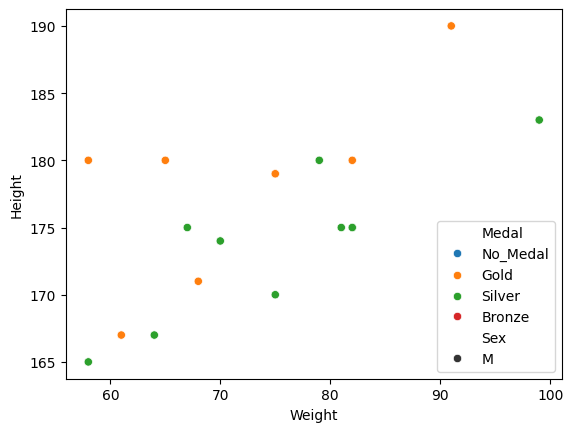

In [ ]:
temp_df=df[df['Sport']=='Ice Hockey']
sns.scatterplot(y=temp_df['Height'],x=temp_df['Weight'],hue=temp_df['Medal'],style=temp_df['Sex'])

In [43]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [78]:
ged_df=df.drop_duplicates(subset=['Name','Sex'])
male=ged_df[ged_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
femail=ged_df[ged_df['Sex']!='M'].groupby('Year').count()['Name'].reset_index()



In [106]:
final_df=male.merge(femail,on='Year',how='left')
final_df.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)
final_df

,Year,Male,Female
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1908,1909,44.0
4,1912,1996,53.0
5,1920,2281,73.0
6,1924,2527,132.0
7,1928,2339,285.0
8,1932,1381,162.0
9,1936,3535,316.0


In [107]:
final_df.fillna(0,inplace=True)

In [102]:
import plotly.express as px


,Year,Name_x,Name_y
0,1896,174,NaN
1,1900,1181,23.0
2,1904,629,6.0
3,1908,1909,44.0
4,1912,1996,53.0
5,1920,2281,73.0
6,1924,2527,132.0
7,1928,2339,285.0
8,1932,1381,162.0
9,1936,3535,316.0


In [108]:
fig = px.line(final_df, x='Year', y=['Male', 'Female'],
              title='Male and Female Trends Over Time',
              labels={'value': 'Count', 'variable': 'Gender'})

fig.show()